In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
def load_dataset(file_path):
  return pd.read_csv(file_path)


df = load_dataset("Health_heart_experimental.csv")
df = df.drop(columns=['ID'])
df.head(10)

,Age,Sex,SysBP,DiaBP,HR,WeightKg,HeightCm,BMI,Indication
0,64,1,141,96,128,69,147,32.0,1
1,21,1,109,100,106,48,150,21.0,0
2,30,0,112,73,126,69,183,21.0,0
3,35,1,106,90,130,45,149,20.0,0
4,39,0,140,90,112,92,166,33.0,1
5,68,1,115,93,130,53,172,18.0,0
6,50,1,125,117,89,56,172,19.0,0
7,23,1,111,85,131,55,169,19.0,0
8,34,1,144,80,90,67,178,21.0,0
9,36,0,113,109,187,46,114,35.0,1


1) LINE GRAPH

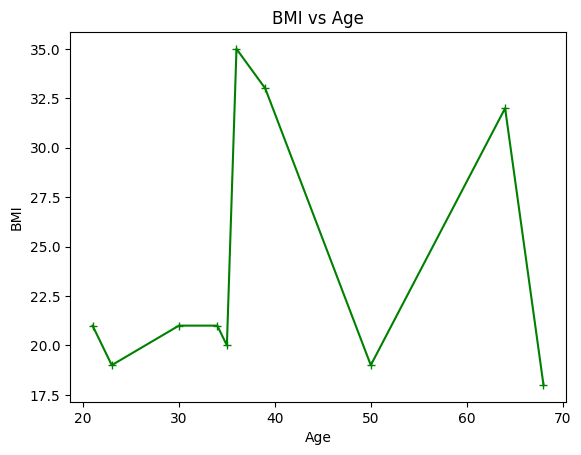

In [51]:
age = [21, 23, 30, 34, 35, 36, 39, 50, 64, 68]

bmi = [21, 19, 21, 21, 20, 35, 33, 19, 32, 18]

# create a line chart
plt.plot(age, bmi, color='green', marker='+', linestyle='solid')

# title
plt.title("BMI vs Age")

# add a label to the y-axis and x-axis
plt.ylabel("BMI")
plt.xlabel("Age")
plt.show()

This line graph shows how BMI changes with age but the numbers are seen going up and down unpredictably. The highest BMI occurs in the mid-30s, while the lowest scores are seen at the youngest and oldest ages. Overall, there is no steady pattern, as the BMI is rising and droping sharply throughout the years. We can conclude that age doesn't affect BMI but many factors like diseases and weaknesses may have impact on BMI for older people


2) BAR PLOT

Sex
0    28.898153
1    28.877897
Name: BMI, dtype: float64


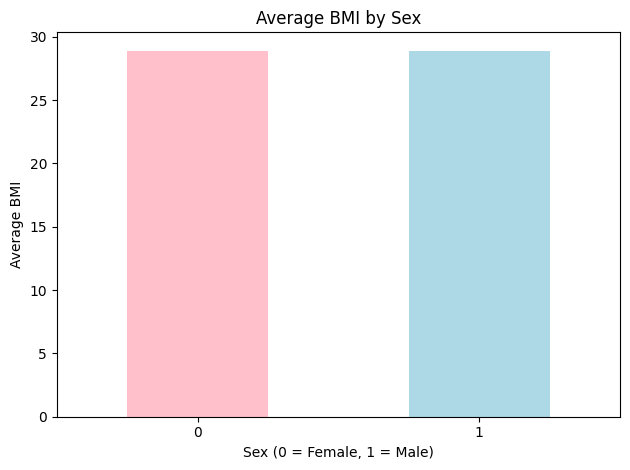

In [44]:
avg_bmi_by_sex = df.groupby('Sex')['BMI'].mean()

print(avg_bmi_by_sex)

# Bar plot
avg_bmi_by_sex.plot(kind='bar',color=['pink', 'lightblue'])
plt.xlabel('Sex (0 = Female, 1 = Male)')   # adjust labels if needed
plt.ylabel('Average BMI')
plt.title('Average BMI by Sex')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This bar plot shows that the average BMI of male and female in the given data is nearly the same. However, males tend to have higher BMI because they are naturally more muscular and are normally heavier than females. The result would have been more different and accurate if the data was big. 


3) PIE CHART

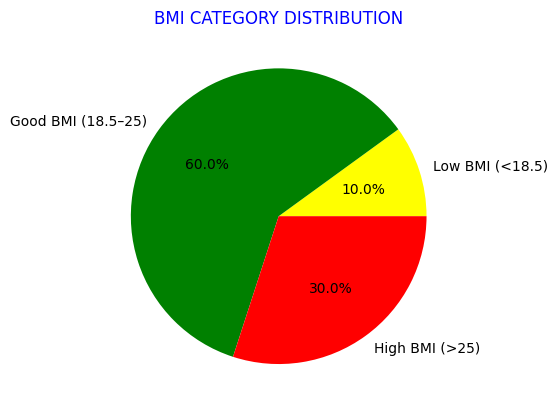

In [45]:
# Pie chart for BMI categories
df = pd.DataFrame({
    "BMI": [32.0, 21.0, 21.0, 20.0, 33.0, 18.0, 19.0, 19.0, 21.0, 35.0]
})
# Calculate counts for each BMI category
low_bmi = (df["BMI"] < 18.5).sum()
good_bmi = ((df["BMI"] >= 18.5) & (df["BMI"] <= 25)).sum()
high_bmi = (df["BMI"] > 25).sum()

# Pie chart data
labels = ["Low BMI (<18.5)", "Good BMI (18.5–25)", "High BMI (>25)"]
sizes = [low_bmi, good_bmi, high_bmi]
colors = ["yellow", "green", "red"]

# Plot pie chart
plt.figure()
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors)
plt.title("BMI CATEGORY DISTRIBUTION", color="Blue")
plt.show()


This pie-chart shows that the BMI of the people in the collected data is differentiated in terms of range. <18.5 is low, 18-25 is ideal and >25 is high. From the pie-chart of given data, we can know that 60% of the people were in ideal category while 30% and 10% were in high and low category respectively. 


4) BOX PLOT

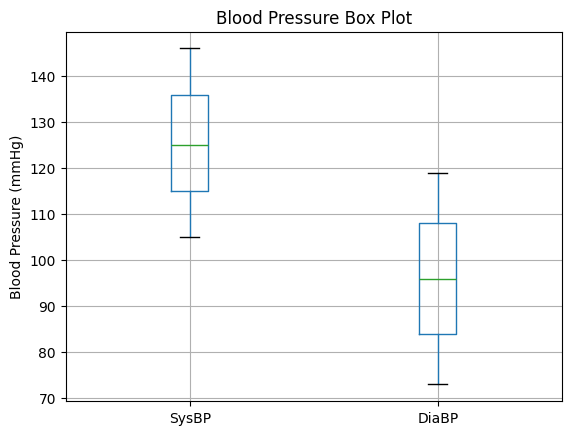

In [55]:
plt.figure()
df[['SysBP', 'DiaBP']].boxplot()
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure Box Plot')
plt.show()

This box plot shows the range and typical levels of systolic (SysBP) and diastolic (DiaBP) blood pressure. Systolic pressure is significantly higher, with most readings falling between 115 and 135 mmHg. Diastolic pressure is lower and shows more variety, with most values ranging from roughly 84 to 108 mmHg.


5) HISTOGRAM

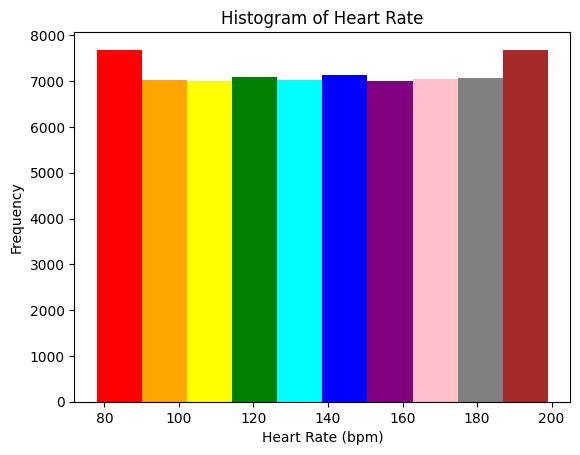

In [58]:
plt.figure()

counts, bins, patches = plt.hist(df['HR'], bins=10)

colors = ['red','orange','yellow','green','cyan','blue','purple','pink','gray','brown']

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.title('Histogram of Heart Rate')
plt.show()


This histogram shows that heart rate measurements are spread very evenly across a wide range from 80 to 200 bpm. Each colored bar represents a group of heart rates, and they all have a nearly identical frequency of around 7,000 to 7,500 occurrences. 


6) SCATTER PLOT

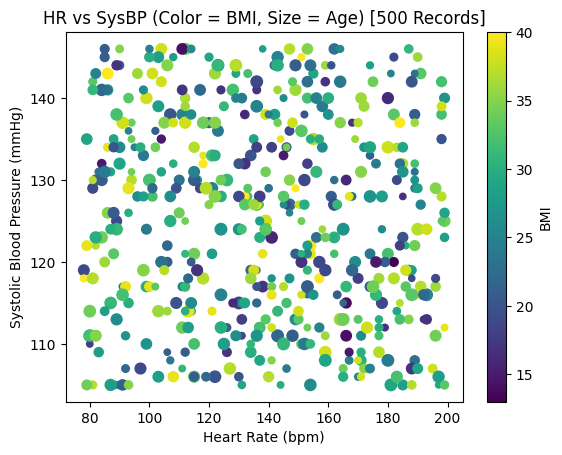

In [60]:
df_500 = df.head(500)

plt.figure()
plt.scatter(
    df_500['HR'],
    df_500['SysBP'],
    c=df_500['BMI'],
    s=df_500['Age'],
)

plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('HR vs SysBP (Color = BMI, Size = Age) [500 Records]')
plt.colorbar(label='BMI')
plt.show()

This scatter plot takes 500 records where the data points are spread throughout the chart, suggesting there is no simple or direct relationship between heart rate and blood pressure for this group. By using different dot sizes for age (bigger the dot, higher the age) and colors for BMI (yellow-purple gradient), the graph displays four different health metrics at once to look for complex patterns.